0.<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Capstone - Prediction Tour Package Sales (A/B Testing)

## 1. Introduction

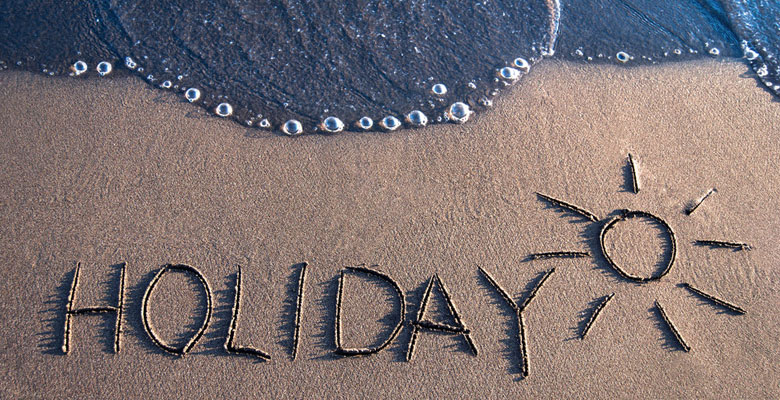

##### Data source: https://www.kaggle.com/susant4learning/holiday-package-purchase-prediction

Problem Overview:

Which group of customer should be targeted to improve the market efficiency?

How likely the customer will purchase the product?

### Import libraries



## 2. Data Overview

### 2.1 Import Libraries

In [1]:
# data processing
import numpy as np
import pandas as pd

# data representation
from dataprep.eda import create_report
from dataprep.eda import plot_missing
from dataprep.eda import plot_correlation
from dataprep.eda import plot

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
sns.set_context("poster")
sns.set(rc={'figure.figsize': (15, 9)})
sns.set_style("darkgrid")

# statistic
from scipy import stats

# algorithm
# from sklearn import model_selection

# from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
# from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
# from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.model_selection import KFold
# from sklearn.naive_bayes import GaussianNB 
# from sklearn.pipeline import Pipeline

# from mlxtend.classifier import StackingClassifier

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import average_precision_score
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc

#setting max. number of core used in environment
NUMEXPR_MAX_THREADS=12

import warnings
warnings.filterwarnings('ignore')

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


### 2.2 Import Data

##### Dictionary about the columns 'Age_Group' and 'Income_Group' 

Age Group: [1:>30, 2:30-39, 3:40-49, 4:50-59, 5:>59 ]

Income Group: [1:<1k, 2:10k-20k, 3:20k-30k, 4:30k-40k, 5:>40k]

In [2]:
# read csv
travel_csv = "Data/travel_cleaned.csv"
data = pd.read_csv(travel_csv)

## 3. EDA

In [3]:
# make a copy of original data
df = data.copy()

In [4]:
# check shape
df.shape

(4853, 21)

In [5]:
# head
df.head(3)

Product_Taken   Age  Type_of_Contact  City_Tier  Duration_of_Pitch  \
0              1  41.0     Self Enquiry          3                6.0   
1              0  49.0  Company Invited          1               14.0   
2              1  37.0     Self Enquiry          1                8.0   

    Occupation  Gender  Number_of_Person_Visiting  Number_of_Followups  \
0     Salaried  Female                          3                  3.0   
1     Salaried    Male                          3                  4.0   
2  Free Lancer    Male                          3                  4.0   

  Product_Pitched  ...  Marital_Status Number_of_Trips  Passport  \
0          Deluxe  ...          Single             1.0         1   
1          Deluxe  ...        Divorced             2.0         0   
2           Basic  ...          Single             7.0         1   

   Pitch_Satisfaction_Score  Own_Car  Number_of_Children_Visiting  \
0                         2        1                          0.0   
1                         3        1                          2.0   
2                         3        0                          0.0   

   Designation Monthly_Income  Age_Group  Income_Group  
0      Manager        20993.0          3             3  
1      Manager        20130.0          3             3  
2    Executive        17090.0          2             2  

[3 rows x 21 columns]

  0%|          | 0/660 [00:00<?, ?it/s]


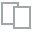
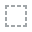
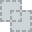
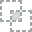
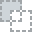
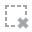
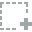
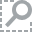
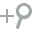
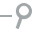
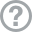
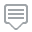
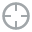
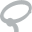
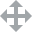
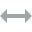
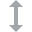
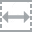
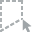
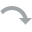
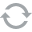
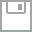
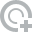
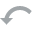
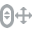
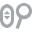
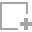
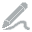
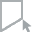
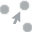
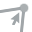
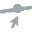

In [6]:
# overview of data
plot(df)

In [7]:
# filtered out categorical feature
df_1 = data.copy()
target = pd.DataFrame()
target['Product_Taken'] = df_1['Product_Taken'].map({0:'Not Taken',1:'Taken'})
df_1 = df_1.drop(['Product_Taken'],axis=1)
df_1 = df_1.fillna(df.median())
df_1 = df_1.dropna()
df_1.head()

Age  Type_of_Contact  City_Tier  Duration_of_Pitch      Occupation  \
0  41.0     Self Enquiry          3                6.0        Salaried   
1  49.0  Company Invited          1               14.0        Salaried   
2  37.0     Self Enquiry          1                8.0     Free Lancer   
3  33.0  Company Invited          1                9.0        Salaried   
4  36.0     Self Enquiry          1                8.0  Small Business   

   Gender  Number_of_Person_Visiting  Number_of_Followups Product_Pitched  \
0  Female                          3                  3.0          Deluxe   
1    Male                          3                  4.0          Deluxe   
2    Male                          3                  4.0           Basic   
3  Female                          2                  3.0           Basic   
4    Male                          2                  3.0           Basic   

   Preferred_Property_Star Marital_Status  Number_of_Trips  Passport  \
0                      3.0         Single              1.0         1   
1                      4.0       Divorced              2.0         0   
2                      3.0         Single              7.0         1   
3                      3.0       Divorced              2.0         1   
4                      4.0       Divorced              1.0         0   

   Pitch_Satisfaction_Score  Own_Car  Number_of_Children_Visiting Designation  \
0                         2        1                          0.0     Manager   
1                         3        1                          2.0     Manager   
2                         3        0                          0.0   Executive   
3                         5        1                          1.0   Executive   
4                         5        1                          0.0   Executive   

   Monthly_Income  Age_Group  Income_Group  
0         20993.0          3             3  
1         20130.0          3             3  
2         17090.0          2             2  
3         17909.0          2             2  
4         18468.0          2             2

In [8]:
# check feature values
categorical_df = pd.DataFrame()
for col in df_1.select_dtypes(include=['object','int64']):
    categorical_df[col] = df_1[col]
categorical_df['Preferred_Property_Star'] = df_1['Preferred_Property_Star']
for col in categorical_df:
    print(f'{col :-<50} {df_1[col].unique()}')

Type_of_Contact----------------------------------- ['Self Enquiry' 'Company Invited']
City_Tier----------------------------------------- [3 1 2]
Occupation---------------------------------------- ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender-------------------------------------------- ['Female' 'Male']
Number_of_Person_Visiting------------------------- [3 2 1 4 5]
Product_Pitched----------------------------------- ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
Marital_Status------------------------------------ ['Single' 'Divorced' 'Married' 'Unmarried']
Passport------------------------------------------ [1 0]
Pitch_Satisfaction_Score-------------------------- [2 3 5 4 1]
Own_Car------------------------------------------- [1 0]
Designation--------------------------------------- ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']
Age_Group----------------------------------------- [3 2 4 1 5]
Income_Group-------------------------------------- [3 2 4]
Preferred_P

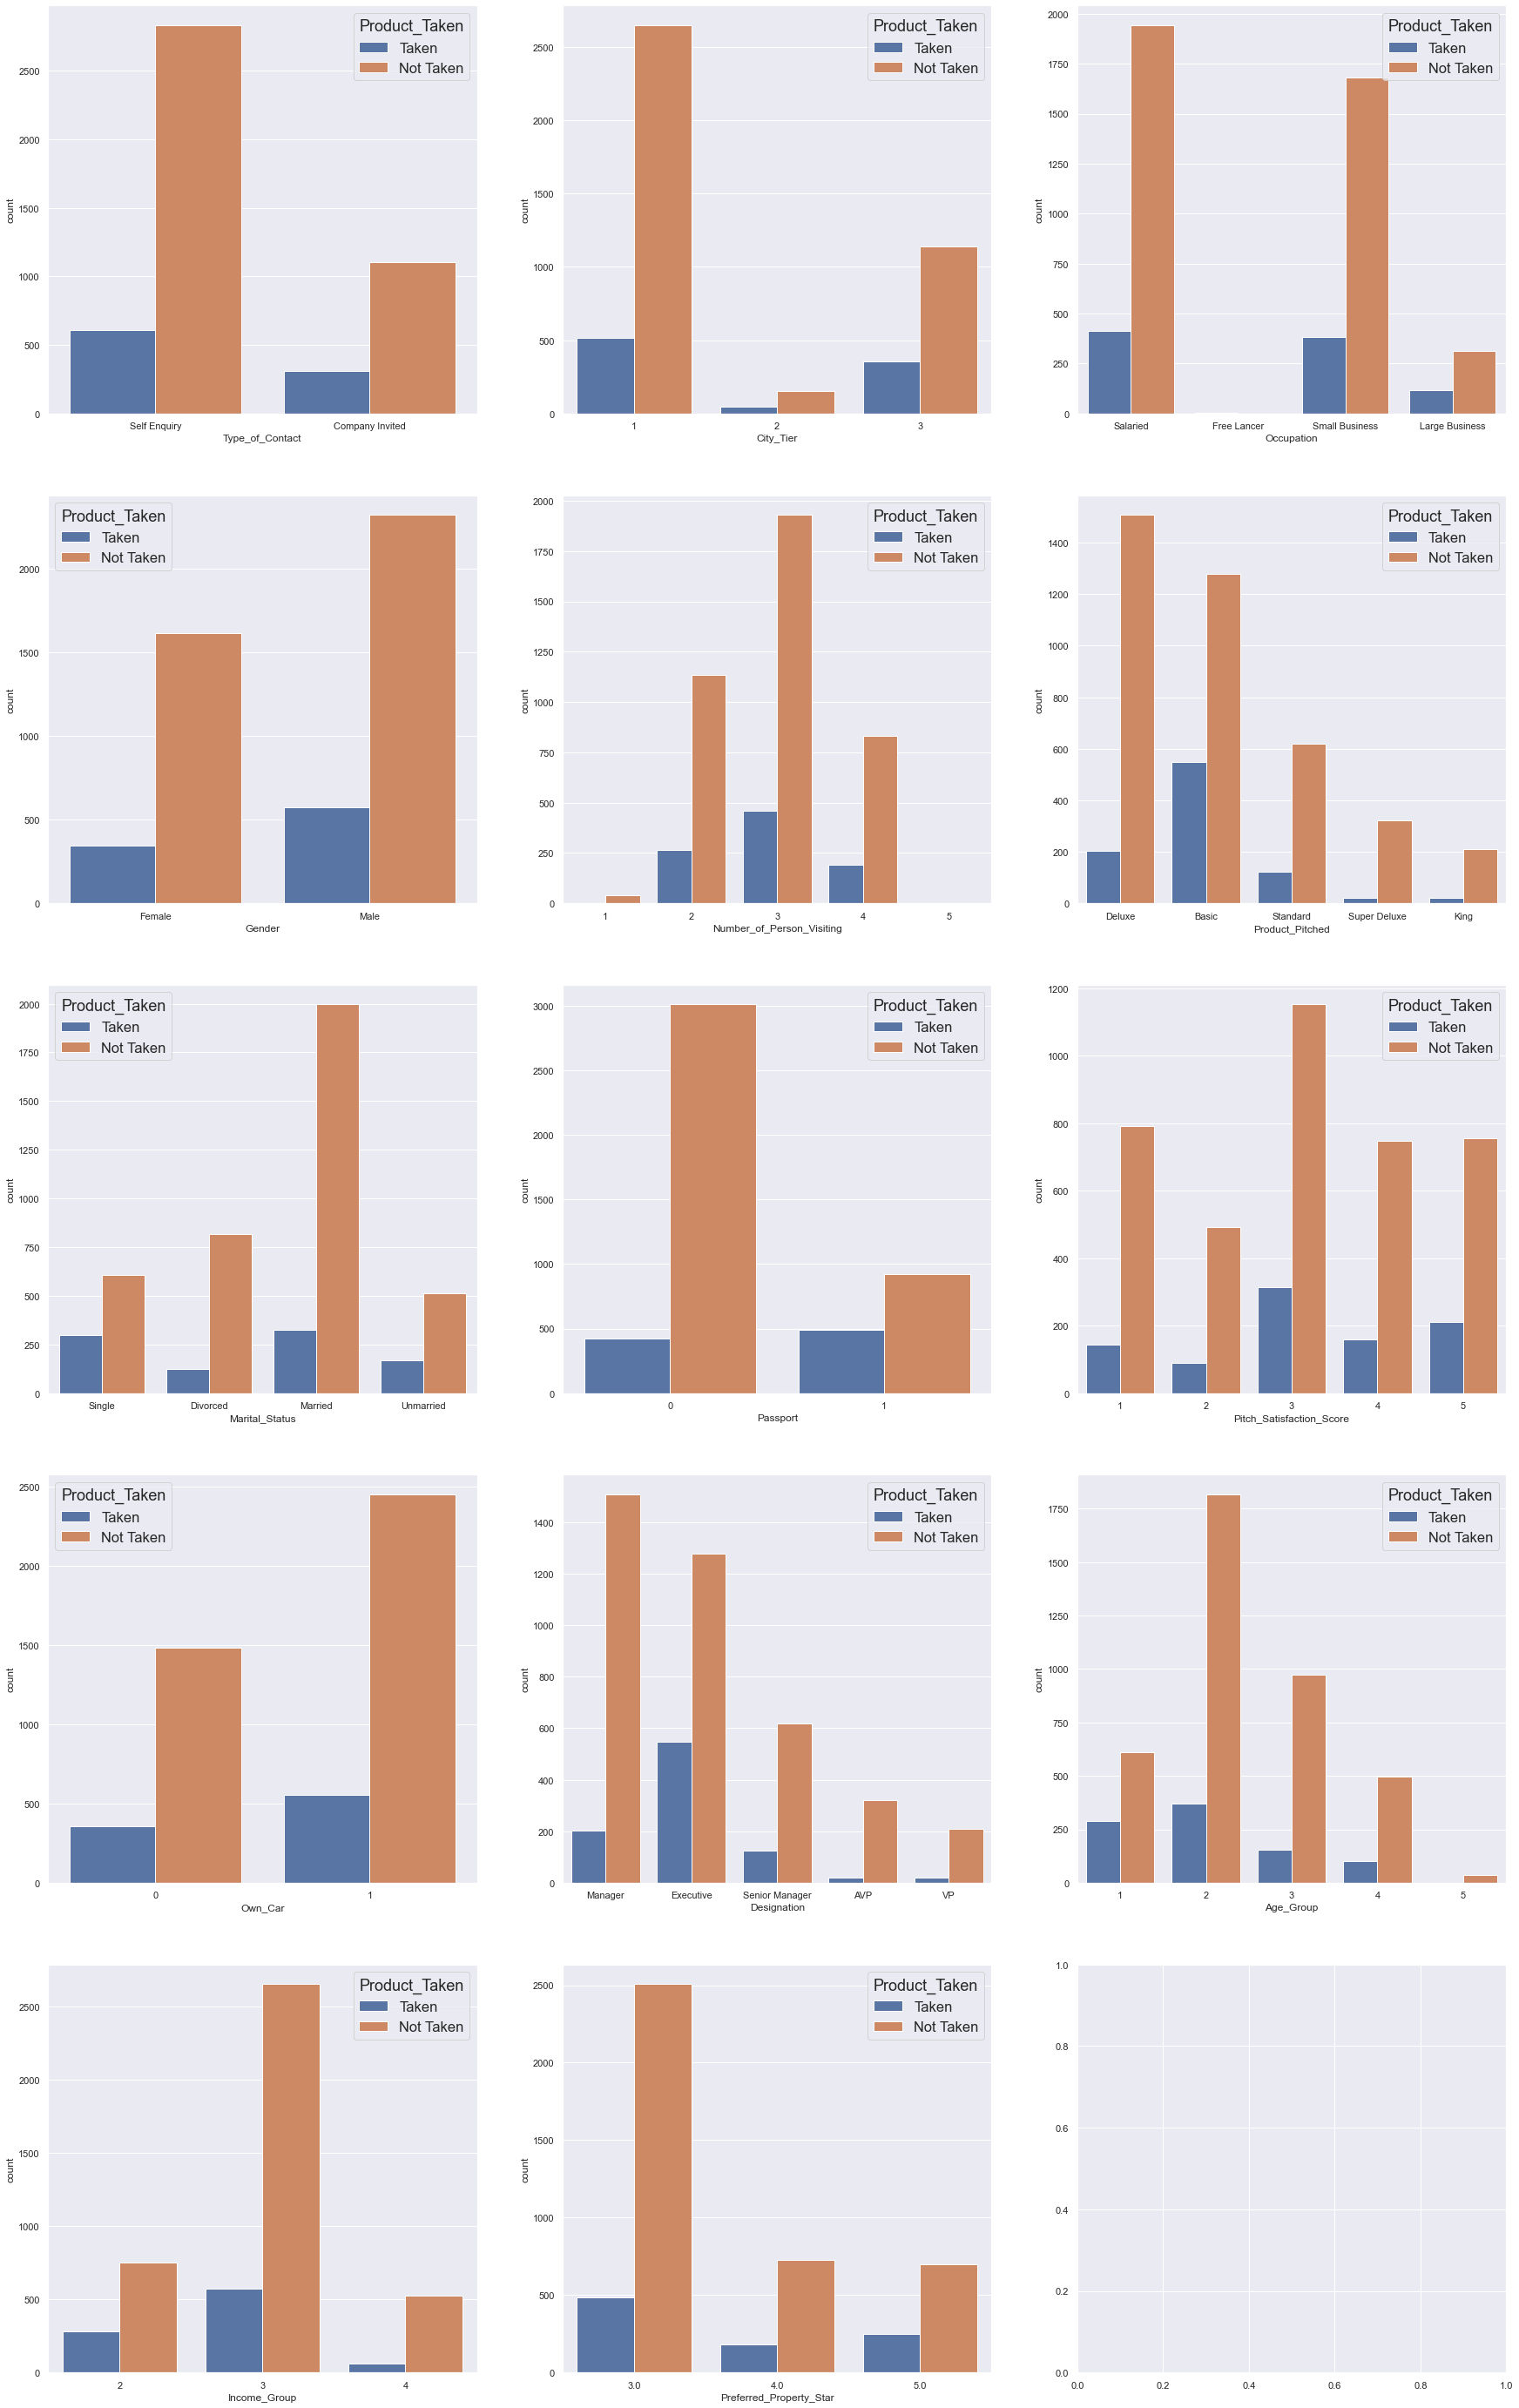

In [9]:
# create chart categorical feature against product taken & not taken
fig, ax = plt.subplots(5,3, figsize=(30, 50))
i=0
sns.set(font_scale = 1.5)
for col in categorical_df: 
    sns.countplot(categorical_df[col], hue=target['Product_Taken'], ax=ax[i//3][i%3])
    i=i+1
plt.show()

In [10]:
# filtered out numeric feature
numeric_df = df_1.copy()
for col in categorical_df:
    numeric_df = numeric_df.drop(col,axis=1)
numeric_df.head()

Age  Duration_of_Pitch  Number_of_Followups  Number_of_Trips  \
0  41.0                6.0                  3.0              1.0   
1  49.0               14.0                  4.0              2.0   
2  37.0                8.0                  4.0              7.0   
3  33.0                9.0                  3.0              2.0   
4  36.0                8.0                  3.0              1.0   

   Number_of_Children_Visiting  Monthly_Income  
0                          0.0         20993.0  
1                          2.0         20130.0  
2                          0.0         17090.0  
3                          1.0         17909.0  
4                          0.0         18468.0

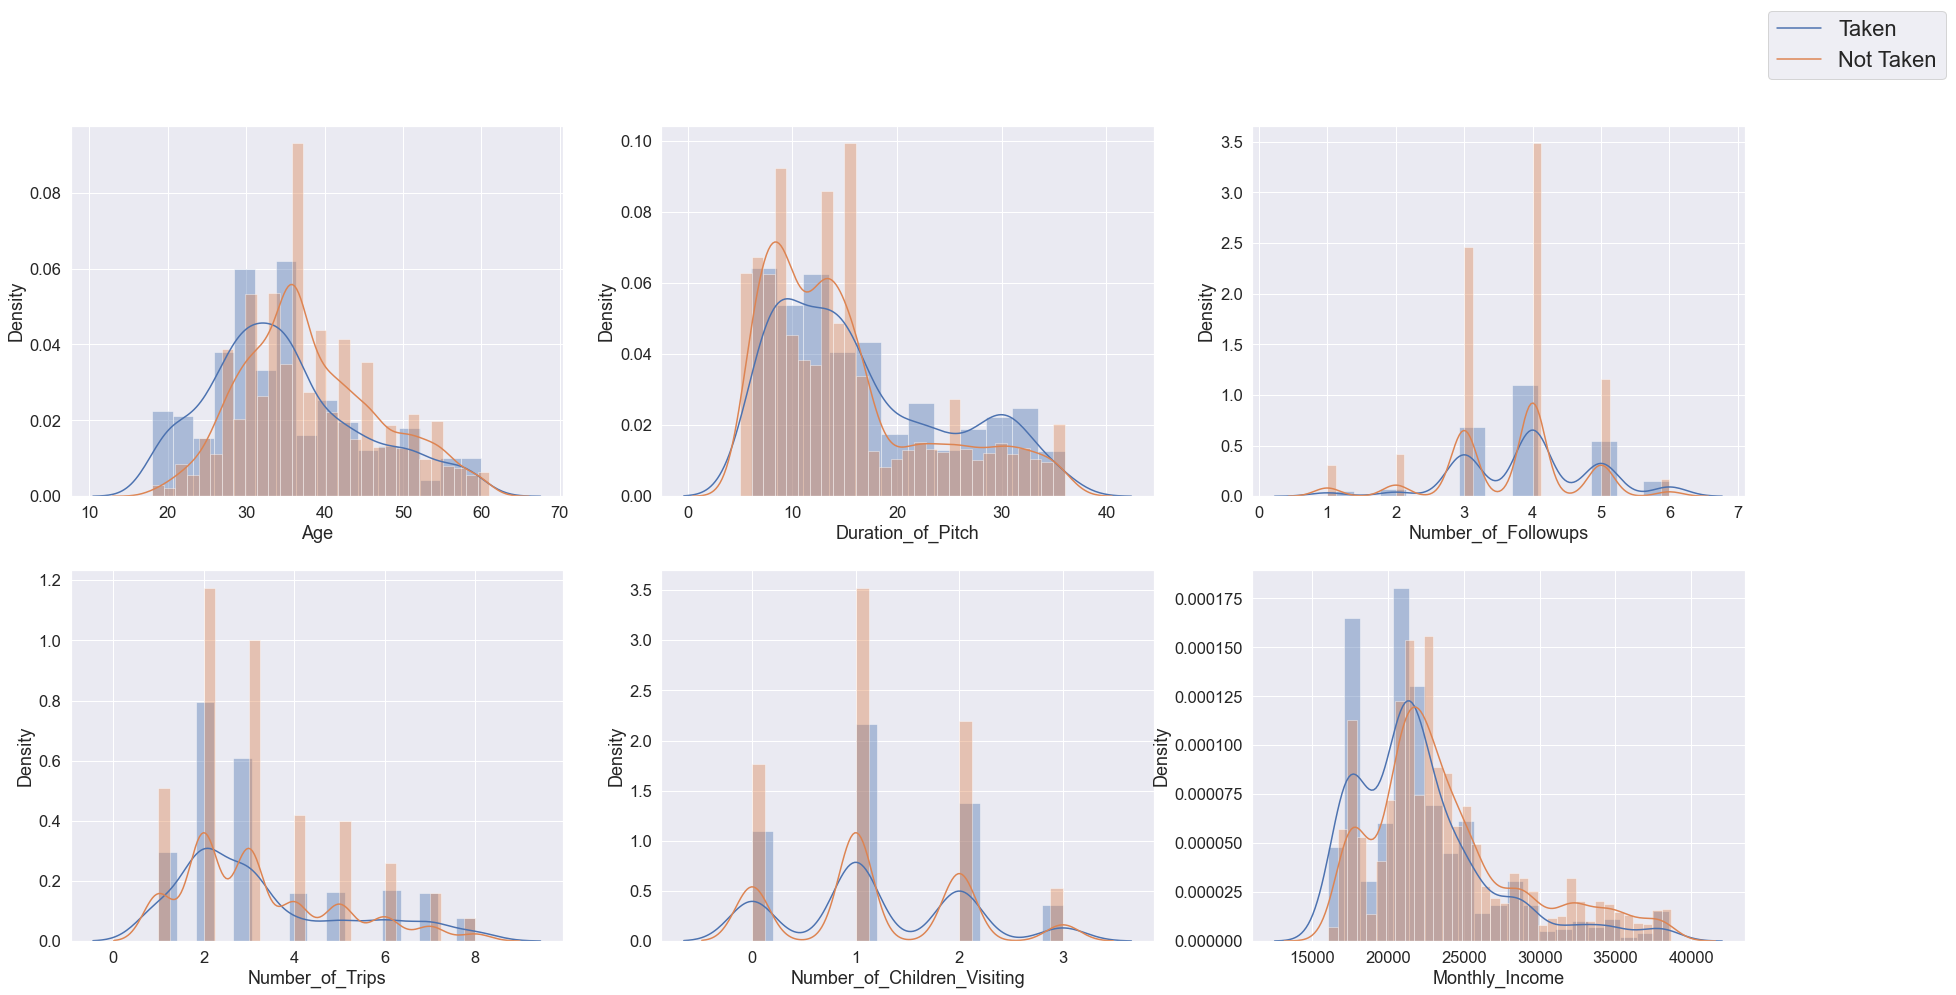

In [11]:
# create chart numeric feature against product taken & not taken 
taken_df = numeric_df[target['Product_Taken']=="Taken"]
not_taken_df = numeric_df[target['Product_Taken']=="Not Taken"]
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(2,3, figsize=(30, 15))
i=0
for col in numeric_df:
    sns.distplot(taken_df[col],label='Taken',ax=ax[i//3][i%3])
    sns.distplot(not_taken_df[col],label='Not Taken',ax=ax[i//3][i%3])
    i=i+1
fig.legend(labels=['Taken','Not Taken'],fontsize='22')
fig.show()

In [12]:
# convert all 'object' feature to numeric for imputation
def encoding(df):
    code = {'Self Enquiry':0,
            'Company Invited':1,
            'Salaried':0,
            'Free Lancer':1,
            'Small Business':2,
            'Large Business':3,
            'Female':0,
            'Male':1,        
            'Basic':0,
            'Standard':1,
            'Deluxe':3,
            'SuperDeluxe':4,
            'King':5,
            'Single':0,
            'Divorced':1,
            'Married':2,
            'Unmarried':3,
            'Executive':0,
            'Manager':1,
            'Senior Manager':2,
            'AVP':3,
            'VP':4
           }
    for col in df.select_dtypes('object'):
        df.loc[:,col]=df[col].map(code)        
    return df

def imputation(df):
    df = df.fillna(df.median())
    df = df.dropna()
    return df

def preprocessing(df):
    df = encoding(df)
    df = imputation(df)
    
    return df

# apply function
df = preprocessing(df)

In [13]:
# Convert the DataFrame object into NumPy array otherwise you will not be able to impute
values = df.values

# define the criteria for dealing with the missing values
imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'median'
)
# Now impute it
imputedData = imputer.fit_transform(values)

In [14]:
scaler = MinMaxScaler(feature_range = (0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [15]:
# move the data back to a dataframe
columns = df.columns
df_n = pd.DataFrame.from_records(normalizedData, columns = columns)
df_n['Product_Taken'] = df_n['Product_Taken'].astype(np.int8)
df_n.sample(5)

Product_Taken       Age  Type_of_Contact  City_Tier  Duration_of_Pitch  \
3158              0  0.488372              0.0        1.0           0.161290   
388               0  0.837209              0.0        0.0           0.193548   
4315              1  0.372093              0.0        0.0           0.387097   
480               0  0.302326              0.0        1.0           0.225806   
3412              0  0.418605              1.0        0.0           0.645161   

      Occupation  Gender  Number_of_Person_Visiting  Number_of_Followups  \
3158    0.000000     1.0                       0.50                  0.6   
388     0.666667     1.0                       0.25                  0.4   
4315    0.666667     1.0                       0.50                  1.0   
480     0.666667     1.0                       0.50                  0.2   
3412    0.000000     1.0                       0.50                  0.6   

      Product_Pitched  ...  Marital_Status  Number_of_Trips  Passport  \
3158              0.6  ...        1.000000         0.142857       1.0   
388               1.0  ...        0.333333         0.571429       0.0   
4315              0.0  ...        0.666667         0.142857       0.0   
480               0.6  ...        0.666667         0.571429       0.0   
3412              0.2  ...        1.000000         0.428571       0.0   

      Pitch_Satisfaction_Score  Own_Car  Number_of_Children_Visiting  \
3158                      0.50      1.0                     0.666667   
388                       0.75      1.0                     0.000000   
4315                      1.00      0.0                     0.333333   
480                       1.00      1.0                     0.666667   
3412                      0.50      0.0                     0.333333   

      Designation  Monthly_Income  Age_Group  Income_Group  
3158         0.25        0.420416       0.25           0.5  
388          1.00        0.811585       0.75           1.0  
4315         0.00        0.268087       0.25           0.5  
480          0.25        0.196356       0.25           0.5  
3412         0.50        0.530748       0.25           0.5  

[5 rows x 21 columns]


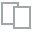
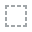
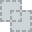
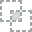
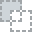
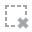
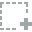
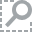
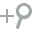
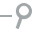
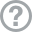
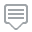
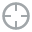
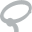
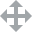
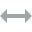
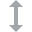
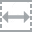
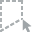
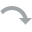
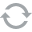
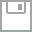
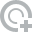
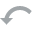
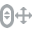
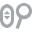
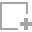
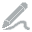
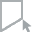
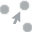
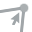
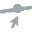

In [16]:
# check correlation
plot_correlation(df_n)

## 4. Define Hypothesis

**Hypothesis:** We assume the sales will be increased if we focus on the targeted customer group.  
     

    H0: Product taken does not increases for targeted customer.
    H1: Product taken increases for targeted customer.

### 4.1 Set Data

In [17]:
# set alpha
alpha = 0.05

In [18]:
# select data set
n = 300
df_targeted = df[df.eval("Income_Group == 2 & (Age_Group == 1) & (Product_Pitched == 0)")]['Product_Taken'].sample(n)
df_targeted

1961    1
1279    1
1866    0
821     0
2274    0
       ..
2374    1
1231    1
1389    0
766     1
23      0
Name: Product_Taken, Length: 300, dtype: int64

In [19]:
# df_nottargeted = df[df.eval("Income_Group != 2 & (Age_Group != 1) & (Product_Pitched != 0)")]['Product_Taken'].sample(n)
df_random = df['Product_Taken'].sample(n)
df_random

4066    0
2521    0
3308    0
3833    0
4064    0
       ..
13      0
3001    0
2178    0
4396    0
1020    0
Name: Product_Taken, Length: 300, dtype: int64

### 4.2 Plot Chart

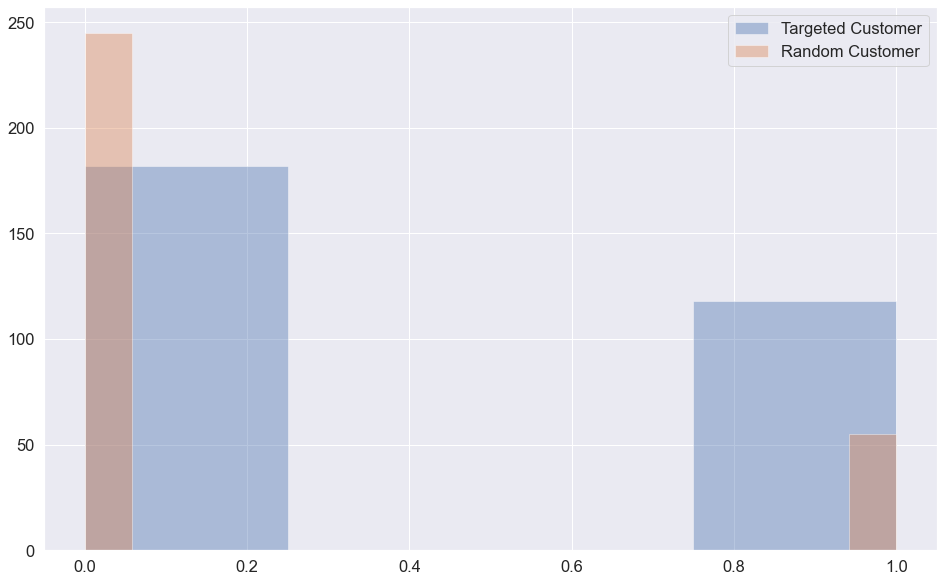

In [20]:
fig, ax = plt.subplots(figsize=(16,10))

ax = sns.distplot(df_targeted, label='Targeted Customer', kde=False);
ax = sns.distplot(df_random, label='Random Customer', kde=False, ax=ax);
plt.legend(loc = 'upper right')
plt.xlabel('')
plt.ylabel('')
plt.show()

## 5. Interpret Result

In [21]:
# Null Hypothesis Dictionary
null_hypothesis = {
    'H0': "Product taken does not increases for targeted customer."
    , 'H1': "Product taken increases for targeted customer."
}

In [22]:
# create function for printing 
def print_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
    if p_value < alpha:
        print("We reject our null hypothesis.")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

In [23]:
# create function for calculating t, p value
def check_sig(p_value, alpha):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    
    Returns:
    Significance message
    '''
    
    str_result = ''
    
    if p_value < alpha:
        str_result = "We reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H1']
    elif p_value > alpha:
        str_result = "We fail to reject our null hypothesis."
        str_result += '\n'
        str_result += null_hypothesis['H0']
    else:
        str_result = "Our test is inconclusive."
    
    return str_result

In [24]:
# ANSWER
def ttest_ind(a, b, alpha=0.05):
    '''
    a, b: The arrays must have the same shape
    alpha: value of alpha
    '''
    N = len(a)
    
    # Calculate Variance
    var_a = a.var()
    var_b = b.var()
    
    # Calculate Standard Deviation     
    std = np.sqrt((var_a + var_b) / 2)
    
    # Calculate t-stat    
    t = (a.mean() - b.mean()) / (std * np.sqrt(2 / N))  # t-statistic
    
    # Calculate degree of freedom     
    df = 2 * N - 2
    
    # Calculate p-value
    p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t
    # Two-tail     
    p = p * 2
    
    return t, p, check_sig(p, alpha)

In [25]:
# ANSWER
t, p, sig = ttest_ind(df_targeted, df_random, alpha)
print("t = " + str(t))
print("p = " + str(p))
print(sig)

t = 5.827017744104274
p = 9.226729380529264e-09
We reject our null hypothesis.
Product taken increases for targeted customer.


In [26]:
# Use Stats Package
t2, p2 = stats.ttest_ind(df_targeted, df_random)
print("t = " + str(t2))
print("p = " + str(p2))
print_sig(p2, alpha)

t = 5.827017744104281
p = 9.226729491718031e-09
We reject our null hypothesis.
Product taken increases for targeted customer.




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



